In [142]:
import os
import pyreadstat
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [143]:
# Paths for different periods
base_path_2017 = "../data/raw/2017-2020"

# Relative paths (common for all periods)
file_paths = {
    "body_measures": "P_BMX.xpt",
    "demographics": "P_DEMO.xpt",
    "blood_pressure": "P_BPXO.xpt",
    "LabData_fast_glucose": "P_GLU.xpt",
    "LabData_glycohemog": "P_GHB.xpt",
    "LabData_insulin": "P_INS.xpt",
    "LabData_Cholest_total": "P_TCHOL.xpt",
    "LabData_Cholest_HDL": "P_HDL.xpt",
    "LabData_Cholest_LDL": "P_TRIGLY.xpt",
    "LabData_C_protein": "P_HSCRP.xpt",
    "LabData_Feretin": "P_FERTIN.xpt",
    "SurveyData_Alcohol": "P_ALQ.xpt",
    "SurveyData_Pressure_Cholest": "P_BPQ.xpt",
    "SurveyData_Diabetes": "P_DIQ.xpt",
    "SurveyData_Diet_Behavior": "P_DBQ.xpt",
    "SurveyData_Insurance": "P_HIQ.xpt",
    "SurveyData_Income": "P_INQ.xpt",
    "SurveyData_Medical": "P_MCQ.xpt",
    "SurveyData_MentalHealth": "P_DPQ.xpt",
    "SurveyData_PhysicalActivity": "P_PAQ.xpt",
    "SurveyData_SleepDisorders": "P_SLQ.xpt",
    "SurveyData_Smoking": "P_SMQ.xpt",
    "SurveyData_WeightHistory": "P_WHQ.xpt"
}


columns_to_keep_2017 = {
    "body_measures": ["SEQN", "BMXWT", "BMXHT", "BMXBMI", "BMXWAIST"],
    "demographics": ["SEQN", "SDDSRVYR", "RIAGENDR", "RIDAGEYR","RIDRETH3","DMDBORN4","DMDEDUC2","RIDEXPRG","INDFMPIR","DMDMARTZ","WTINTPRP","WTMECPRP"],
    "blood_pressure": ["SEQN", "BPXOSY1", "BPXOSY2", "BPXOSY3", "BPXODI1", "BPXODI2", "BPXODI3","BPXOPLS1", "BPXOPLS2", "BPXOPLS3"],
    "LabData_fast_glucose": ["SEQN","WTSAFPRP","LBDGLUSI"],
    "LabData_glycohemog": ["SEQN","LBXGH"],
    "LabData_insulin": ["SEQN","LBXIN"],      
    "LabData_Cholest_total": ["SEQN","LBDTCSI"],
    "LabData_Cholest_HDL": ["SEQN","LBDHDDSI"],
    "LabData_Cholest_LDL": ["SEQN","LBXTR", "LBDTRSI","LBDLDL"],         
    "LabData_C_protein": ["SEQN","LBXHSCRP"],
    "LabData_Feretin": ["SEQN","LBDFERSI"], 
    "SurveyData_Alcohol" : ["SEQN","ALQ111","ALQ121","ALQ130","ALQ142","ALQ151"],
    "SurveyData_Pressure_Cholest" : ["SEQN","BPQ020","BPQ040A","BPQ050A","BPQ080", "BPQ090D"],
    "SurveyData_Diabetes" : ["SEQN","DIQ160"],
    "SurveyData_Diet_Behavior" : ["SEQN","DBD900","DBD905","DBD910","DBQ197","DBD895"],
    "SurveyData_Insurance" : ["SEQN","HIQ011"],
    "SurveyData_Income" : ["SEQN","INDFMMPC"],
    "SurveyData_Medical" : ["SEQN","MCQ080","MCQ160B","MCQ160C","MCQ160M","MCQ300C"],
    "SurveyData_MentalHealth" : ["SEQN","DPQ020","DPQ030","DPQ040","DPQ060","DPQ070"],
    "SurveyData_PhysicalActivity" : ["SEQN","PAQ605","PAQ620","PAQ635","PAQ650","PAQ665","PAD680"],
    "SurveyData_SleepDisorders" : ["SEQN","SLD012","SLQ120"],
    "SurveyData_Smoking" : ["SEQN","SMQ020","SMD650"],
    "SurveyData_WeightHistory" : ["SEQN","WHD110","WHD120","WHD140"]  
}


In [144]:
def load_data(base_path, file_paths, columns_to_keep):
    """
    Loads data from the specified file paths and filters the columns.

    """

    dataframes = {}
    for key, relative_path in file_paths.items():
        # Construct the full file path
        file_path = os.path.join(base_path, relative_path)
        try:
            # Check if the file exists
            if not os.path.exists(file_path):
                print(f"Error: File '{file_path}' does not exist!")
                continue

            # Handle specific encoding if needed (e.g., for 'LabData_insulin')
            if key == "LabData_insulin":
                data, _ = pyreadstat.read_xport(file_path, encoding="latin1")
            else:
                # Default loading
                data, _ = pyreadstat.read_xport(file_path)

            # Filter columns based on the specified list
            dataframes[key] = data[columns_to_keep[key]]
            print(f"The file '{key}' has been successfully loaded.")
        except Exception as e:
            print(f"Error loading the file '{key}': {e}")
    return dataframes

In [145]:
# Load data 
dataframes_2017 = load_data(base_path_2017, file_paths, columns_to_keep_2017)

# Check the loaded datasets
print("Loaded datasets:")
for key, df in dataframes_2017.items():
    print(f"{key}: {len(df)} rows, {len(df.columns)} columns")

The file 'body_measures' has been successfully loaded.
The file 'demographics' has been successfully loaded.
The file 'blood_pressure' has been successfully loaded.
The file 'LabData_fast_glucose' has been successfully loaded.
The file 'LabData_glycohemog' has been successfully loaded.
The file 'LabData_insulin' has been successfully loaded.
The file 'LabData_Cholest_total' has been successfully loaded.
The file 'LabData_Cholest_HDL' has been successfully loaded.
The file 'LabData_Cholest_LDL' has been successfully loaded.
The file 'LabData_C_protein' has been successfully loaded.
The file 'LabData_Feretin' has been successfully loaded.
The file 'SurveyData_Alcohol' has been successfully loaded.
The file 'SurveyData_Pressure_Cholest' has been successfully loaded.
The file 'SurveyData_Diabetes' has been successfully loaded.
The file 'SurveyData_Diet_Behavior' has been successfully loaded.
The file 'SurveyData_Insurance' has been successfully loaded.
The file 'SurveyData_Income' has been

In [146]:
final_dataset_2017 = reduce(
    lambda left, right: left.merge(right, on="SEQN", how="outer"), 
    dataframes_2017.values())

print(final_dataset_2017.shape)

final_dataset_2017.head()



(15560, 77)


,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,RIDEXPRG,INDFMPIR,DMDMARTZ,WTINTPRP,WTMECPRP,BPXOSY1,BPXOSY2,BPXOSY3,BPXODI1,BPXODI2,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3,WTSAFPRP,LBDGLUSI,LBXGH,LBXIN,LBDTCSI,LBDHDDSI,LBXTR,LBDTRSI,LBDLDL,LBXHSCRP,LBDFERSI,ALQ111,ALQ121,ALQ130,ALQ142,ALQ151,BPQ020,BPQ040A,BPQ050A,BPQ080,BPQ090D,DIQ160,DBD900,DBD905,DBD910,DBQ197,DBD895,HIQ011,INDFMMPC,MCQ080,MCQ160B,MCQ160C,MCQ160M,MCQ300C,DPQ020,DPQ030,DPQ040,DPQ060,DPQ070,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,SLD012,SLD013,SMQ020,SMD650,WHD110,WHD120,WHD140
0,109263.0,NaN,NaN,NaN,NaN,66.0,1.0,2.0,6.0,1.0,NaN,NaN,4.66,NaN,7891.762435,8951.815567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,42.2,154.7,17.6,63.8,66.0,2.0,13.0,1.0,1.0,NaN,NaN,0.83,NaN,11689.747264,12271.157043,109.0,109.0,106.0,67.0,68.0,66.0,94.0,95.0,91.0,27533.174559,5.38,5.3,6.05,4.29,1.86,40.0,0.452,86.0,0.11,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,12.0,89.3,15.0,41.2,66.0,1.0,2.0,3.0,1.0,NaN,NaN,3.06,NaN,16273.825939,16658.764203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.31,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,3.0,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,97.1,160.2,37.8,117.9,66.0,2.0,29.0,6.0,2.0,5.0,2.0,5.00,3.0,7825.646112,8154.968193,99.0,99.0,99.0,56.0,55.0,52.0,68.0,66.0,66.0,NaN,NaN,5.2,NaN,5.04,1.45,NaN,NaN,NaN,0.72,11.6,1.0,10.0,1.0,0.0,2.0,2.0,NaN,NaN,1.0,2.0,1.0,0.0,0.0,5.0,2.0,7.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,480.0,7.5,8.0,2.0,NaN,NaN,210.0,218.0
4,109269.0,13.6,NaN,NaN,NaN,66.0,1.0,2.0,2.0,1.0,NaN,NaN,0.96,NaN,5906.250521,6848.271782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73,41.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,2.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
# Update the SDDSRVYR column to represent the period
final_dataset_2017['SDDSRVYR'] = '2017-2020'

# Add the period to SEQN by concatenating the values
final_dataset_2017['SEQN'] = final_dataset_2017['SEQN'].astype(str) + '_' + final_dataset_2017['SDDSRVYR']

# Validate the changes
print(final_dataset_2017[['SEQN', 'SDDSRVYR']].head())

                 SEQN   SDDSRVYR
0  109263.0_2017-2020  2017-2020
1  109264.0_2017-2020  2017-2020
2  109265.0_2017-2020  2017-2020
3  109266.0_2017-2020  2017-2020
4  109269.0_2017-2020  2017-2020


In [148]:
# Create the WHtR feature
final_dataset_2017['WHtR'] = round(final_dataset_2017['BMXWAIST'] / final_dataset_2017['BMXHT'],2)
# Checking
#final_dataset_2017[['BMXWAIST', 'BMXHT', 'WHtR']].head(20)

# Calculate derived features
final_dataset_2017['AvgSystolicBP'] = final_dataset_2017[['BPXOSY1', 'BPXOSY2', 'BPXOSY3']].mean(axis=1)
final_dataset_2017['AvgDiastolicBP'] = final_dataset_2017[['BPXODI1', 'BPXODI2', 'BPXODI3']].mean(axis=1)
final_dataset_2017['PulsePressure'] = final_dataset_2017['AvgSystolicBP'] - final_dataset_2017['AvgDiastolicBP']
final_dataset_2017['AvgPulseRate'] = final_dataset_2017[['BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3']].mean(axis=1)

# Drop original columns
columns_to_drop = ['BPXOSY1', 'BPXOSY2', 'BPXOSY3',
                   'BPXODI1', 'BPXODI2', 'BPXODI3',
                   'BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3']

In [149]:
final_dataset_2017.drop(columns=columns_to_drop, inplace=True)
final_dataset_2017[['AvgSystolicBP', 'AvgDiastolicBP', 'PulsePressure', 'AvgPulseRate']].head()

,AvgSystolicBP,AvgDiastolicBP,PulsePressure,AvgPulseRate
0,NaN,NaN,NaN,NaN
1,108.0,67.000000,41.000000,93.333333
2,NaN,NaN,NaN,NaN
3,99.0,54.333333,44.666667,66.666667
4,NaN,NaN,NaN,NaN


In [150]:
final_dataset_2017.head()

,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,RIDEXPRG,INDFMPIR,DMDMARTZ,WTINTPRP,WTMECPRP,WTSAFPRP,LBDGLUSI,LBXGH,LBXIN,LBDTCSI,LBDHDDSI,LBXTR,LBDTRSI,LBDLDL,LBXHSCRP,LBDFERSI,ALQ111,ALQ121,ALQ130,ALQ142,ALQ151,BPQ020,BPQ040A,BPQ050A,BPQ080,BPQ090D,DIQ160,DBD900,DBD905,DBD910,DBQ197,DBD895,HIQ011,INDFMMPC,MCQ080,MCQ160B,MCQ160C,MCQ160M,MCQ300C,DPQ020,DPQ030,DPQ040,DPQ060,DPQ070,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,SLD012,SLD013,SMQ020,SMD650,WHD110,WHD120,WHD140,WHtR,AvgSystolicBP,AvgDiastolicBP,PulsePressure,AvgPulseRate
0,109263.0_2017-2020,NaN,NaN,NaN,NaN,2017-2020,1.0,2.0,6.0,1.0,NaN,NaN,4.66,NaN,7891.762435,8951.815567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0_2017-2020,42.2,154.7,17.6,63.8,2017-2020,2.0,13.0,1.0,1.0,NaN,NaN,0.83,NaN,11689.747264,12271.157043,27533.174559,5.38,5.3,6.05,4.29,1.86,40.0,0.452,86.0,0.11,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,108.0,67.000000,41.000000,93.333333
2,109265.0_2017-2020,12.0,89.3,15.0,41.2,2017-2020,1.0,2.0,3.0,1.0,NaN,NaN,3.06,NaN,16273.825939,16658.764203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.31,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,3.0,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46,NaN,NaN,NaN,NaN
3,109266.0_2017-2020,97.1,160.2,37.8,117.9,2017-2020,2.0,29.0,6.0,2.0,5.0,2.0,5.00,3.0,7825.646112,8154.968193,NaN,NaN,5.2,NaN,5.04,1.45,NaN,NaN,NaN,0.72,11.6,1.0,10.0,1.0,0.0,2.0,2.0,NaN,NaN,1.0,2.0,1.0,0.0,0.0,5.0,2.0,7.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,480.0,7.5,8.0,2.0,NaN,NaN,210.0,218.0,0.74,99.0,54.333333,44.666667,66.666667
4,109269.0_2017-2020,13.6,NaN,NaN,NaN,2017-2020,1.0,2.0,2.0,1.0,NaN,NaN,0.96,NaN,5906.250521,6848.271782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73,41.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,2.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
final_dataset_2017 = final_dataset_2017.dropna(subset=['LBDGLUSI', 'LBXGH', 'LBXIN'])
print(final_dataset_2017.shape)
final_dataset_2017[['LBDGLUSI', 'LBXGH', 'LBXIN']].isna().sum()

(4616, 73)


LBDGLUSI    0
LBXGH       0
LBXIN       0
dtype: int64

In [152]:
# Creating HOMA-IR 
# Formula: HOMA-IR = (Fasting Glucose * Insulin) / 22.5

final_dataset_2017['HOMA_IR'] = (final_dataset_2017['LBDGLUSI'] * final_dataset_2017['LBXIN']) / 22.5

#Diabetes_Status

def determine_diabetes_status(row):
    if row['LBDGLUSI'] >= 7.0 or row['LBXGH'] >= 6.5:
        return 2  # Diabetes
    elif 5.6 <= row['LBDGLUSI'] < 7.0 or 5.7 <= row['LBXGH'] < 6.5:
        return 1  # Prediabetes
    else:
        return 0  # Normal

# creation target 1 
final_dataset_2017['Diabetes_Status'] = final_dataset_2017.apply(determine_diabetes_status, axis=1)

# Assign Insulin_Resistance based on HOMA-IR > 2.9
final_dataset_2017['Insulin_Resistance'] = (final_dataset_2017['HOMA_IR'] > 2.9).astype(int)


In [153]:
print(final_dataset_2017.shape)
final_dataset_2017.head()

(4616, 76)


,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,RIDEXPRG,INDFMPIR,DMDMARTZ,WTINTPRP,WTMECPRP,WTSAFPRP,LBDGLUSI,LBXGH,LBXIN,LBDTCSI,LBDHDDSI,LBXTR,LBDTRSI,LBDLDL,LBXHSCRP,LBDFERSI,ALQ111,ALQ121,ALQ130,ALQ142,ALQ151,BPQ020,BPQ040A,BPQ050A,BPQ080,BPQ090D,DIQ160,DBD900,DBD905,DBD910,DBQ197,DBD895,HIQ011,INDFMMPC,MCQ080,MCQ160B,MCQ160C,MCQ160M,MCQ300C,DPQ020,DPQ030,DPQ040,DPQ060,DPQ070,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,SLD012,SLD013,SMQ020,SMD650,WHD110,WHD120,WHD140,WHtR,AvgSystolicBP,AvgDiastolicBP,PulsePressure,AvgPulseRate,HOMA_IR,Diabetes_Status,Insulin_Resistance
1,109264.0_2017-2020,42.2,154.7,17.6,63.8,2017-2020,2.0,13.0,1.0,1.0,NaN,NaN,0.83,NaN,11689.747264,12271.157043,27533.174559,5.38,5.3,6.05,4.29,1.86,40.0,0.452,86.0,0.11,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,108.000000,67.000000,41.000000,93.333333,1.446622,0,0
6,109271.0_2017-2020,98.8,182.3,29.7,120.4,2017-2020,1.0,49.0,3.0,1.0,2.0,NaN,NaN,3.0,8481.589837,8658.732873,18100.965319,5.72,5.6,16.96,3.80,0.85,84.0,0.948,97.0,28.68,196.0,1.0,0.0,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,60.0,10.0,13.0,1.0,20.0,280.0,350.0,350.0,0.66,107.000000,67.000000,40.000000,71.333333,4.311609,1,1
9,109274.0_2017-2020,103.7,185.3,30.2,109.6,2017-2020,1.0,68.0,7.0,1.0,4.0,NaN,1.20,3.0,7227.993241,7801.600218,16281.758327,8.55,5.7,13.52,2.72,0.75,133.0,1.502,49.0,1.60,366.0,1.0,4.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,300.0,9.5,9.5,2.0,NaN,240.0,190.0,270.0,0.59,134.000000,70.000000,64.000000,NaN,5.137600,2,1
12,109277.0_2017-2020,48.7,162.0,18.6,67.6,2017-2020,2.0,12.0,1.0,1.0,NaN,NaN,1.35,NaN,16385.743307,17519.418144,32230.046209,5.11,5.3,6.44,3.34,1.55,24.0,0.271,64.0,2.46,45.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,0.0,3.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.42,102.333333,55.000000,47.333333,71.000000,1.462596,0,0
17,109282.0_2017-2020,83.3,177.1,26.6,NaN,2017-2020,1.0,76.0,3.0,1.0,5.0,NaN,3.61,1.0,28363.015286,31816.346500,79007.100787,5.27,5.5,7.49,6.03,1.11,132.0,1.490,164.0,3.11,49.8,1.0,0.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,8.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,900.0,7.0,8.0,1.0,NaN,175.0,135.0,208.0,NaN,139.333333,72.666667,66.666667,55.000000,1.754324,0,0


In [154]:
final_dataset_2017['Diabetes_Status'].value_counts()
#final_dataset_2017['Insulin_Resistance'].value_counts()

1    2155
0    1718
2     743
Name: Diabetes_Status, dtype: int64

In [155]:
columns_order = [
    'SEQN', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'WHtR', 'AvgSystolicBP', 
    'AvgDiastolicBP', 'PulsePressure', 'AvgPulseRate', 'SDDSRVYR', 'RIAGENDR', 
    'RIDAGEYR', 'RIDRETH3', 'DMDBORN4', 'DMDEDUC2', 'RIDEXPRG', 'INDFMPIR', 
    'DMDMARTZ', 'LBDGLUSI', 'LBXGH', 'LBXIN', 'LBDTCSI', 'LBDHDDSI', 'LBXTR', 
    'LBDTRSI', 'LBDLDL', 'LBXHSCRP', 'LBDFERSI', 'ALQ111', 'ALQ121', 'ALQ130', 
    'ALQ142', 'ALQ151', 'BPQ020', 'BPQ040A', 'BPQ050A', 'BPQ080', 'BPQ090D', 
    'DIQ160', 'DBD900', 'DBD905', 'DBD910', 'DBQ197', 'DBD895', 'HIQ011', 
    'INDFMMPC', 'MCQ080', 'MCQ160B', 'MCQ160C', 'MCQ160M', 'MCQ300C', 'DPQ020', 
    'DPQ030', 'DPQ040', 'DPQ060', 'DPQ070', 'PAQ605', 'PAQ620', 'PAQ635', 
    'PAQ650', 'PAQ665', 'PAD680', 'SLD012', 'SLD013', 'SMQ020', 'SMD650', 
    'WHD110', 'WHD120', 'WHD140', 'HOMA_IR',
    # Таргетные переменные
    'Diabetes_Status', 'Insulin_Resistance',
    # Весовые коэффициенты
    'WTINTPRP', 'WTMECPRP', 'WTSAFPRP'
]


final_dataset_2017 = final_dataset_2017[columns_order]

In [156]:
print(final_dataset_2017.shape)
final_dataset_2017.head()

(4616, 76)


,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,WHtR,AvgSystolicBP,AvgDiastolicBP,PulsePressure,AvgPulseRate,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,RIDEXPRG,INDFMPIR,DMDMARTZ,LBDGLUSI,LBXGH,LBXIN,LBDTCSI,LBDHDDSI,LBXTR,LBDTRSI,LBDLDL,LBXHSCRP,LBDFERSI,ALQ111,ALQ121,ALQ130,ALQ142,ALQ151,BPQ020,BPQ040A,BPQ050A,BPQ080,BPQ090D,DIQ160,DBD900,DBD905,DBD910,DBQ197,DBD895,HIQ011,INDFMMPC,MCQ080,MCQ160B,MCQ160C,MCQ160M,MCQ300C,DPQ020,DPQ030,DPQ040,DPQ060,DPQ070,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,SLD012,SLD013,SMQ020,SMD650,WHD110,WHD120,WHD140,HOMA_IR,Diabetes_Status,Insulin_Resistance,WTINTPRP,WTMECPRP,WTSAFPRP
1,109264.0_2017-2020,42.2,154.7,17.6,63.8,0.41,108.000000,67.000000,41.000000,93.333333,2017-2020,2.0,13.0,1.0,1.0,NaN,NaN,0.83,NaN,5.38,5.3,6.05,4.29,1.86,40.0,0.452,86.0,0.11,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.446622,0,0,11689.747264,12271.157043,27533.174559
6,109271.0_2017-2020,98.8,182.3,29.7,120.4,0.66,107.000000,67.000000,40.000000,71.333333,2017-2020,1.0,49.0,3.0,1.0,2.0,NaN,NaN,3.0,5.72,5.6,16.96,3.80,0.85,84.0,0.948,97.0,28.68,196.0,1.0,0.0,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,60.0,10.0,13.0,1.0,20.0,280.0,350.0,350.0,4.311609,1,1,8481.589837,8658.732873,18100.965319
9,109274.0_2017-2020,103.7,185.3,30.2,109.6,0.59,134.000000,70.000000,64.000000,NaN,2017-2020,1.0,68.0,7.0,1.0,4.0,NaN,1.20,3.0,8.55,5.7,13.52,2.72,0.75,133.0,1.502,49.0,1.60,366.0,1.0,4.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,300.0,9.5,9.5,2.0,NaN,240.0,190.0,270.0,5.137600,2,1,7227.993241,7801.600218,16281.758327
12,109277.0_2017-2020,48.7,162.0,18.6,67.6,0.42,102.333333,55.000000,47.333333,71.000000,2017-2020,2.0,12.0,1.0,1.0,NaN,NaN,1.35,NaN,5.11,5.3,6.44,3.34,1.55,24.0,0.271,64.0,2.46,45.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,0.0,3.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.462596,0,0,16385.743307,17519.418144,32230.046209
17,109282.0_2017-2020,83.3,177.1,26.6,NaN,NaN,139.333333,72.666667,66.666667,55.000000,2017-2020,1.0,76.0,3.0,1.0,5.0,NaN,3.61,1.0,5.27,5.5,7.49,6.03,1.11,132.0,1.490,164.0,3.11,49.8,1.0,0.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,8.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,900.0,7.0,8.0,1.0,NaN,175.0,135.0,208.0,1.754324,0,0,28363.015286,31816.346500,79007.100787


In [157]:
final_dataset_2017['DMDMARTZ'].value_counts()

1.0     2287
2.0      867
3.0      748
77.0       2
99.0       2
Name: DMDMARTZ, dtype: int64

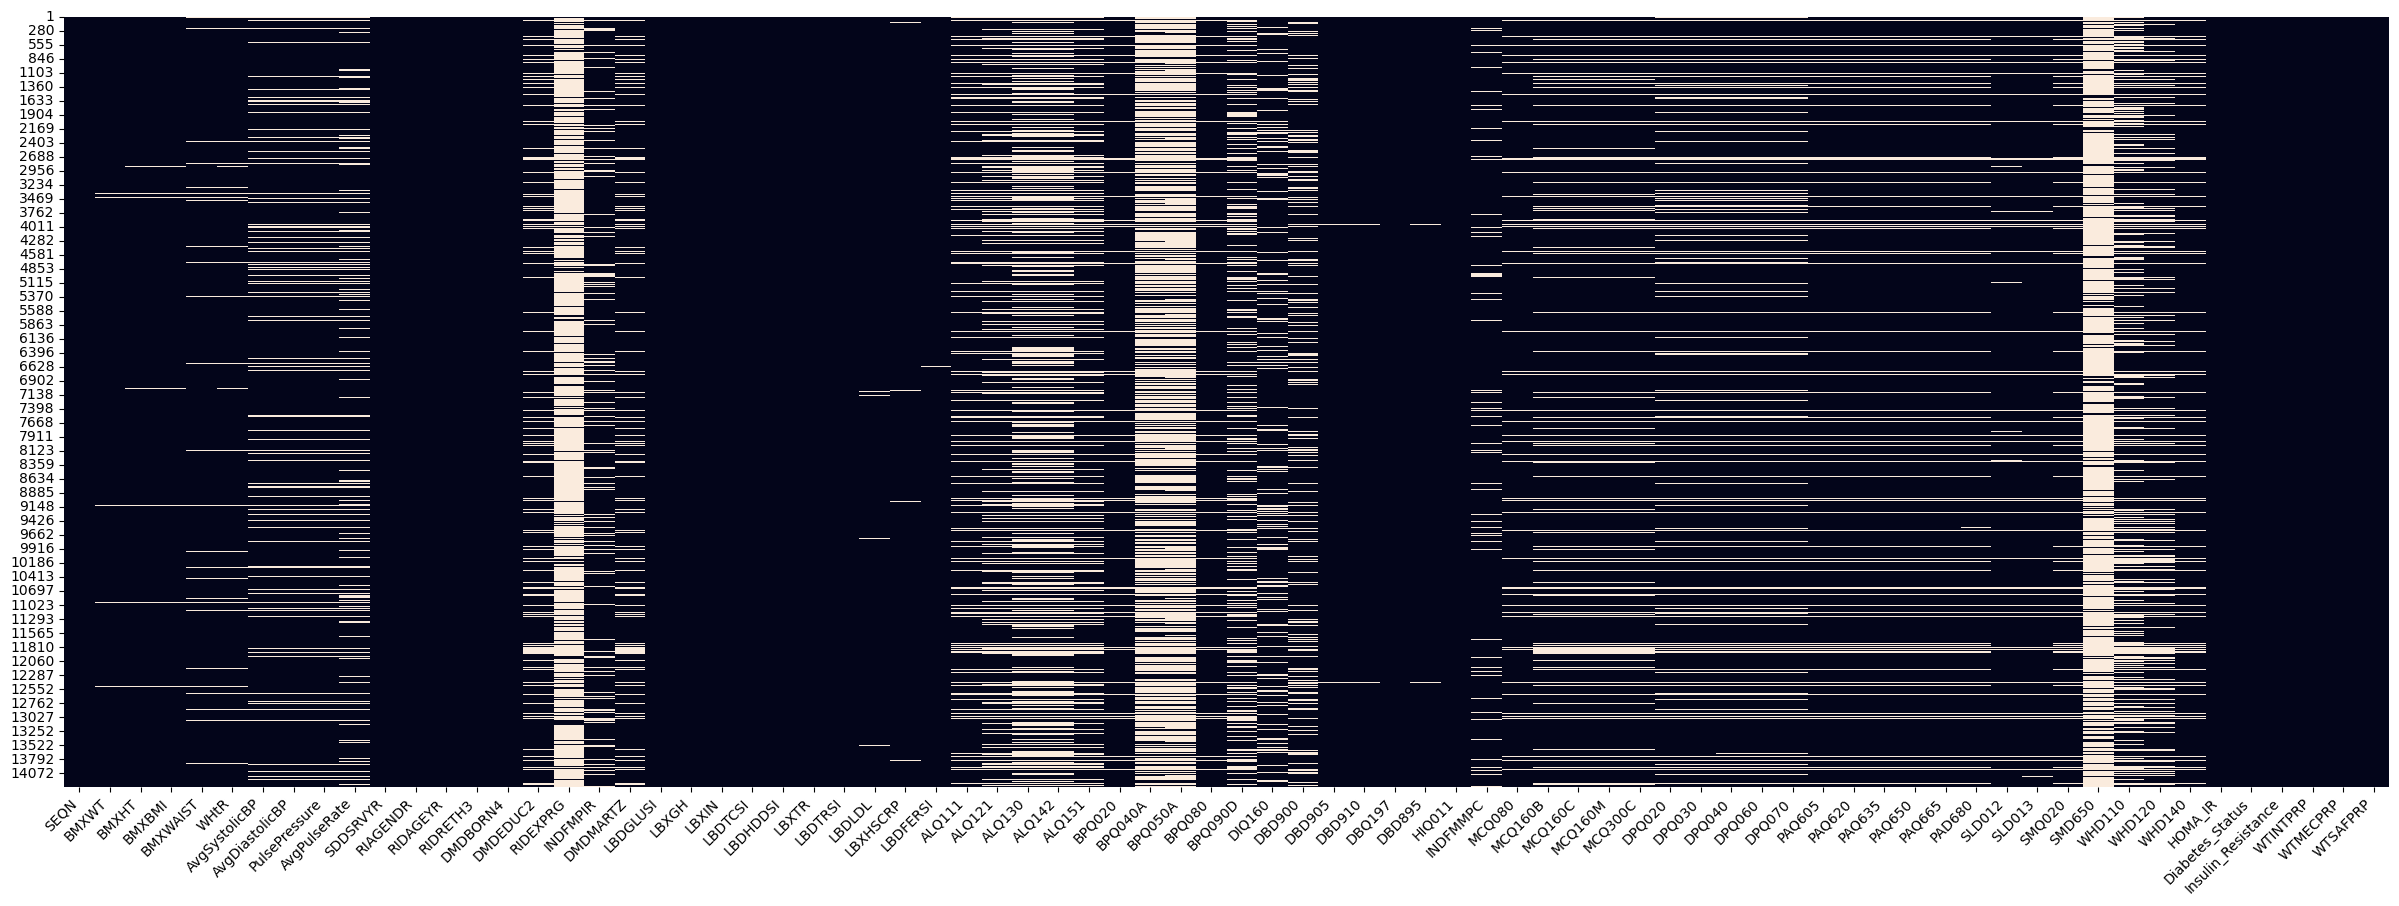

In [158]:
plt.figure(figsize=(30,10))
sns.heatmap(final_dataset_2017.isna(),cbar=False)
plt.xticks(rotation=45, ha='right')  # Поворот на 45 градусов и выравнивание по правому краю

plt.show()

In [159]:
final_dataset_2017.isna().sum()

SEQN                     0
BMXWT                   69
BMXHT                   76
BMXBMI                  81
BMXWAIST               196
WHtR                   206
AvgSystolicBP          452
AvgDiastolicBP         452
PulsePressure          452
AvgPulseRate           761
SDDSRVYR                 0
RIAGENDR                 0
RIDAGEYR                 0
RIDRETH3                 0
DMDBORN4                 0
DMDEDUC2               710
RIDEXPRG              3819
INDFMPIR               620
DMDMARTZ               710
LBDGLUSI                 0
LBXGH                    0
LBXIN                    0
LBDTCSI                  3
LBDHDDSI                 3
LBXTR                    3
LBDTRSI                  3
LBDLDL                  36
LBXHSCRP                 9
LBDFERSI                 3
ALQ111                 782
ALQ121                1142
ALQ130                1931
ALQ142                1931
ALQ151                1143
BPQ020                 358
BPQ040A               3082
BPQ050A               3218
B

1. Идентификатор
	•	SEQN: Уникальный идентификатор респондента.
	
2. Антропометрия (Body Measures)
	•	BMXWT: Вес (кг).
	•	BMXHT: Рост (см).
	•	BMXBMI: Индекс массы тела (кг/м²).
	•	BMXWAIST: Обхват талии (см).
	•	WHtR: Соотношение талии к росту (BMXWAIST / BMXHT).
	
3. Артериальное давление
	•	AvgSystolicBP: Среднее систолическое давление (мм рт. ст.).
	•	AvgDiastolicBP: Среднее диастолическое давление (мм рт. ст.).
	•	PulsePressure: Пульсовое давление (AvgSystolicBP − AvgDiastolicBP).
	•	AvgPulseRate: Средний пульс (удары в минуту).
	
4. Демографические признаки
	•	SDDSRVYR: Цикл данных (период).
	•	RIAGENDR: Пол (1 — Мужчина, 2 — Женщина).
	•	RIDAGEYR: Возраст (лет).
	•	RIDRETH3: Расовая принадлежность.
	•	DMDBORN4: Место рождения.
	•	DMDEDUC2: Уровень образования.
	•	RIDEXPRG: Статус беременности.
	•	WTINTPRP, WTMECPRP: Весовые коэффициенты для выборки.
	•	INDFMPIR: Соотношение дохода семьи к бедности.
	•	DMDMARTZ: Семейное положение.
	
5. Лабораторные анализы
	•	WTSAFPRP: Весовой коэффициент для анализа глюкозы.
	•	LBDGLUSI: Глюкоза натощак (ммоль/л).
	•	LBXGH: Гликированный гемоглобин (%).
	•	LBXIN: Инсулин (мкЕд/мл).
	•	LBDTCSI: Общий холестерин (ммоль/л).
	•	LBDHDDSI: Холестерин ЛПВП (ммоль/л).
	•	LBXTR: Триглицериды (мг/дл).
	•	LBDTRSI: Триглицериды (ммоль/л).
	•	LBDLDL: Холестерин ЛПНП (ммоль/л).
	•	LBXHSCRP: С-реактивный белок (мг/л).
	•	LBDFERSI: Ферритин (мкг/л).
	
6. Употребление алкоголя
	•	ALQ111: Наличие опыта употребления алкоголя.
	•	ALQ121: Частота употребления алкоголя за последний год.
	•	ALQ130: Среднее количество напитков за день.
	•	ALQ142: Количество дней с употреблением алкоголя за последние 12 месяцев.
	•	ALQ151: Периоды частого употребления алкоголя.
	
7. История гипертонии и заболеваний
	•	BPQ020: Диагностирована ли гипертония.
	•	BPQ040A: Принимает ли препараты от гипертонии.
	•	BPQ050A: Принимает ли препараты от высокого давления.
	•	BPQ080: Диагностирован ли высокий уровень холестерина.
	•	BPQ090D: Принимает ли препараты для снижения уровня холестерина.
	
8. Диабет
	•	DIQ160: Диагностирован ли диабет.
	
9. Диетическое поведение
	•	DBD900: Количество приемов пищи в заведениях фастфуда за последние 30 дней.
	•	DBD905: Количество готовых к употреблению продуктов за последние 30 дней.
	•	DBD910: Количество замороженных блюд за последние 30 дней.
	•	DBQ197: Потребление молочных продуктов за последние 30 дней.
	•	DBD895: Количество приемов пищи, приготовленных не дома.
	
10. Социальные и финансовые параметры
	•	HIQ011: Наличие медицинской страховки.
	•	INDFMMPC: Соотношение дохода семьи к уровню бедности.
	
11. Медицинские показатели
	•	MCQ080: Были ли указания врача на избыточный вес.
	•	MCQ160B: Были ли случаи сердечной недостаточности у респондента.
	•	MCQ160C: Были ли случаи ишемической болезни сердца.
	•	MCQ160M: Были ли проблемы со щитовидной железой.
	•	MCQ300C: Были ли случаи диабета у близких родственников.
	
12. Психическое здоровье
	•	DPQ020: Чувство подавленности или безнадежности.
	•	DPQ030: Проблемы со сном.
	•	DPQ040: Чувство усталости или недостаток энергии.
	•	DPQ060: Низкая самооценка.
	•	DPQ070: Проблемы с концентрацией.
	
13. Физическая активность
	•	PAQ605: Активная работа.
	•	PAQ620: Умеренная работа.
	•	PAQ635: Ходьба или езда на велосипеде.
	•	PAQ650: Активный отдых.
	•	PAQ665: Умеренные занятия спортом.
	•	PAD680: Минуты сидячей активности в день.
	
14. Сон
	•	SLD012: Количество часов сна в будние дни.
	•	SLQ120: Частота чувства чрезмерной сонливости днем.

15. Курение
	•	SMQ020: Курил ли респондент 100 или более сигарет за свою жизнь.
	•	SMD650: Среднее количество сигарет в день за последние 30 дней.

16. История веса
	•	WHD110: Вес 10 лет назад (фунты).
	•	WHD120: Вес в возрасте 25 лет (фунты).
	•	WHD140: Максимальный вес в жизни (фунты).
	

In [160]:

categorical_features = [
    'SEQN', 'SDDSRVYR', 'RIAGENDR', 'RIDRETH3', 'DMDBORN4', 'DMDEDUC2',
    'RIDEXPRG', 'DMDMARTZ', 'ALQ111', 'ALQ121', 'ALQ151', 'BPQ020',
    'BPQ040A', 'BPQ050A', 'BPQ080', 'BPQ090D', 'DIQ160', 'HIQ011',
    'INDFMMPC', 'MCQ080', 'MCQ160B', 'MCQ160C', 'MCQ160M', 'MCQ300C',
    'DPQ020', 'DPQ030', 'DPQ040', 'DPQ060', 'DPQ070', 'PAQ605', 'PAQ620',
    'PAQ635', 'PAQ650', 'PAQ665', 'SLD013', 'SMQ020', 'Diabetes_Status',
    'Insulin_Resistance'
]
numeric_features = [
    'BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'WHtR', 'AvgSystolicBP',
    'AvgDiastolicBP', 'PulsePressure', 'AvgPulseRate', 'RIDAGEYR', 'INDFMPIR',
    'LBDGLUSI', 'LBXGH', 'LBXIN', 'LBDTCSI', 'LBDHDDSI', 'LBXTR', 'LBDTRSI',
    'LBDLDL', 'LBXHSCRP', 'LBDFERSI', 'ALQ130', 'ALQ142', 'DBD900', 'DBD905',
    'DBD910', 'DBQ197', 'DBD895', 'PAD680', 'SLD012', 'SMD650', 'WHD110',
    'WHD120', 'WHD140', 'HOMA_IR', 'WTINTPRP', 'WTMECPRP', 'WTSAFPRP'
]


In [161]:
test_dataset_2017 = final_dataset_2017.dropna(subset=['BMXWT', 'BMXHT', 'BMXBMI','BMXWAIST','AvgSystolicBP','AvgDiastolicBP','DMDEDUC2','INDFMPIR','ALQ121','WHD120','SLD012','SLD013','DBD900'])

In [162]:
test_dataset_2017.isna().sum()

SEQN                     0
BMXWT                    0
BMXHT                    0
BMXBMI                   0
BMXWAIST                 0
WHtR                     0
AvgSystolicBP            0
AvgDiastolicBP           0
PulsePressure            0
AvgPulseRate           142
SDDSRVYR                 0
RIAGENDR                 0
RIDAGEYR                 0
RIDRETH3                 0
DMDBORN4                 0
DMDEDUC2                 0
RIDEXPRG              1574
INDFMPIR                 0
DMDMARTZ                 0
LBDGLUSI                 0
LBXGH                    0
LBXIN                    0
LBDTCSI                  0
LBDHDDSI                 0
LBXTR                    0
LBDTRSI                  0
LBDLDL                  18
LBXHSCRP                 2
LBDFERSI                 0
ALQ111                   0
ALQ121                   0
ALQ130                 424
ALQ142                 424
ALQ151                   1
BPQ020                   0
BPQ040A               1151
BPQ050A               1219
B

In [163]:
test_dataset_2017.shape

(1921, 76)

In [92]:
test_dataset_2017['Insulin_Resistance'].value_counts()
test_dataset_2017['Diabetes_Status'].value_counts()

1    1203
0     717
2     476
Name: Diabetes_Status, dtype: int64

In [99]:
test_dataset_2017['DIQ160'].value_counts()

2.0    1628
1.0     265
9.0       5
Name: DIQ160, dtype: int64

In [137]:
test_dataset_2017 = test_dataset_2017.copy()
test_dataset_2017['HasWorkActivity'] = ((test_dataset_2017['PAQ605'] == 1.0) | (test_dataset_2017['PAQ620'] == 1.0)).astype(int)
#df['HasLeisureActivity'] = ((test_dataset_2017['PAQ650'] == 'Да') | (test_dataset_2017['PAQ665'] == 'Да')).astype(int)

In [140]:
test_dataset_2017['HasWorkActivity'].value_counts()


0    1219
1    1158
Name: HasWorkActivity, dtype: int64

In [139]:
test_dataset_2017.head()


,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,WHtR,AvgSystolicBP,AvgDiastolicBP,PulsePressure,AvgPulseRate,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,RIDEXPRG,INDFMPIR,DMDMARTZ,LBDGLUSI,LBXGH,LBXIN,LBDTCSI,LBDHDDSI,LBXTR,LBDTRSI,LBDLDL,LBXHSCRP,LBDFERSI,ALQ111,ALQ121,ALQ130,ALQ142,ALQ151,BPQ020,BPQ040A,BPQ050A,BPQ080,BPQ090D,DIQ160,DBD900,DBD905,DBD910,DBQ197,DBD895,HIQ011,INDFMMPC,MCQ080,MCQ160B,MCQ160C,MCQ160M,MCQ300C,DPQ020,DPQ030,DPQ040,DPQ060,DPQ070,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,SLD012,SLD013,SMQ020,SMD650,WHD110,WHD120,WHD140,HOMA_IR,Diabetes_Status,Insulin_Resistance,WTINTPRP,WTMECPRP,WTSAFPRP,HasWorkActivity
9,109274.0_2017-2020,103.7,185.3,30.2,109.6,0.59,134.000000,70.000000,64.000000,NaN,2017-2020,1.0,68.0,7.0,1.0,4.0,NaN,1.20,3.0,8.55,5.7,13.52,2.72,0.75,133.0,1.502,49.0,1.60,366.0,1.0,4.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,300.0,9.5,9.5,2.0,NaN,240.0,190.0,270.0,5.137600,2,1,7227.993241,7801.600218,16281.758327,1
24,109290.0_2017-2020,73.0,161.2,28.1,92.0,0.57,121.333333,60.333333,61.000000,58.000000,2017-2020,2.0,68.0,4.0,1.0,5.0,NaN,5.00,2.0,5.88,8.4,20.25,4.27,1.03,102.0,1.152,105.0,0.25,212.0,1.0,0.0,NaN,NaN,2.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,3.0,0.0,2.0,9999.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,180.0,4.0,4.0,2.0,NaN,130.0,115.0,155.0,5.292000,2,1,3967.693106,4099.841985,8548.619835,1
26,109292.0_2017-2020,86.0,167.8,30.5,108.3,0.65,138.000000,97.000000,41.000000,92.000000,2017-2020,1.0,58.0,2.0,1.0,3.0,NaN,1.60,2.0,10.00,6.4,21.40,4.45,1.34,90.0,1.016,102.0,3.08,483.0,1.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,NaN,1.0,10.0,3.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,0.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,2.0,600.0,4.5,4.5,2.0,NaN,172.0,155.0,198.0,9.511111,2,1,15941.778001,17463.112885,0.000000,0
33,109300.0_2017-2020,62.0,144.7,29.6,84.8,0.59,162.333333,94.000000,68.333333,59.000000,2017-2020,2.0,54.0,6.0,2.0,5.0,NaN,5.00,1.0,5.72,5.4,11.47,5.17,1.63,50.0,0.565,127.0,1.45,242.0,1.0,0.0,NaN,NaN,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,12.0,0.0,2.0,3.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,60.0,4.0,14.0,2.0,NaN,120.0,110.0,130.0,2.915929,1,1,20550.019050,23643.304810,49174.160468,0
40,109307.0_2017-2020,67.9,166.2,24.6,87.0,0.52,115.000000,68.333333,46.666667,65.333333,2017-2020,1.0,47.0,6.0,2.0,1.0,NaN,1.38,1.0,5.72,5.3,8.23,4.16,1.03,142.0,1.603,93.0,0.32,1050.0,1.0,9.0,1.0,0.0,2.0,2.0,NaN,NaN,2.0,NaN,2.0,NaN,1.0,0.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,120.0,7.5,11.0,1.0,NaN,150.0,150.0,150.0,2.092249,1,0,15248.743900,16989.215538,43092.065846,0


In [133]:
print(((test_dataset_2017['PAQ605'] == 1.0) | (test_dataset_2017['PAQ620'] == 1.0)).value_counts())
print(df['HasWorkActivity'].value_counts())

False    1219
True     1158
dtype: int64
0.0    879
1.0    799
Name: HasWorkActivity, dtype: int64


In [134]:
print(len(test_dataset_2017))  # Размер исходного набора данных
print(len(df))                 # Размер DataFrame с HasWorkActivity

2377
10195
